In [143]:
import pandas as pd
import numpy as np

In [144]:
df=pd.read_csv("Crop.csv")

In [145]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [146]:
df.sample(1)

,N,P,K,temperature,humidity,ph,rainfall,label
1446,106,20,51,29.730197,90.970157,6.342573,20.490356,muskmelon


First let me explain this data to you 
<br>so i have N(ratio of Nitrogen content in soil), P
, K  is nitrogen,phosphorus and potassium respectively
<br>and then temperature in degree celsius 
<br> humidity is in percentage 
<br>ph is Ph value of the soil 
<br> and finally rainfall in mm





In [147]:
df.shape

(2200, 8)

In [148]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [149]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

so there is no null value present in our dataset which is a good thing 

In [150]:
df.duplicated().sum()

0

There is no duplicated value present in our dataset which is a good thing 

In [151]:
df['label'].nunique()

22

So there are 22 unique crops are present in our dataset

In [152]:
crop_name=list(df['label'].unique())

In [153]:
crop_name

['rice',
 'maize',
 'chickpea',
 'kidneybeans',
 'pigeonpeas',
 'mothbeans',
 'mungbean',
 'blackgram',
 'lentil',
 'pomegranate',
 'banana',
 'mango',
 'grapes',
 'watermelon',
 'muskmelon',
 'apple',
 'orange',
 'papaya',
 'coconut',
 'cotton',
 'jute',
 'coffee']

these are all unique crops present in our dataset

In [154]:
df.head(3)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice


lets plot crop requirements 

In [155]:
df[df['label']=='rice']['N'].mean()

79.89

so this is a mean value of N for rice

In [156]:
N={}
for i in crop_name:
    N.update({i:df[df['label']==i]['N'].mean() for i in crop_name})
print(N)
    
    
    

{'rice': 79.89, 'maize': 77.76, 'chickpea': 40.09, 'kidneybeans': 20.75, 'pigeonpeas': 20.73, 'mothbeans': 21.44, 'mungbean': 20.99, 'blackgram': 40.02, 'lentil': 18.77, 'pomegranate': 18.87, 'banana': 100.23, 'mango': 20.07, 'grapes': 23.18, 'watermelon': 99.42, 'muskmelon': 100.32, 'apple': 20.8, 'orange': 19.58, 'papaya': 49.88, 'coconut': 21.98, 'cotton': 117.77, 'jute': 78.4, 'coffee': 101.2}


In [157]:
type(N)

dict

In [158]:
N.items()

dict_items([('rice', 79.89), ('maize', 77.76), ('chickpea', 40.09), ('kidneybeans', 20.75), ('pigeonpeas', 20.73), ('mothbeans', 21.44), ('mungbean', 20.99), ('blackgram', 40.02), ('lentil', 18.77), ('pomegranate', 18.87), ('banana', 100.23), ('mango', 20.07), ('grapes', 23.18), ('watermelon', 99.42), ('muskmelon', 100.32), ('apple', 20.8), ('orange', 19.58), ('papaya', 49.88), ('coconut', 21.98), ('cotton', 117.77), ('jute', 78.4), ('coffee', 101.2)])

In [159]:
avg_N=pd.DataFrame(list(N.items()),columns=['Crop','avg_Nitrogen'])

In [160]:
avg_N

,Crop,avg_Nitrogen
0,rice,79.89
1,maize,77.76
2,chickpea,40.09
3,kidneybeans,20.75
4,pigeonpeas,20.73
5,mothbeans,21.44
6,mungbean,20.99
7,blackgram,40.02
8,lentil,18.77
9,pomegranate,18.87


In [161]:
import matplotlib.pyplot as plt
import seaborn as sns

In [162]:
avg_N.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Crop          22 non-null     object 
 1   avg_Nitrogen  22 non-null     float64
dtypes: float64(1), object(1)
memory usage: 480.0+ bytes


In [163]:
avg_N.shape

(22, 2)

<Axes: xlabel='avg_Nitrogen', ylabel='Crop'>

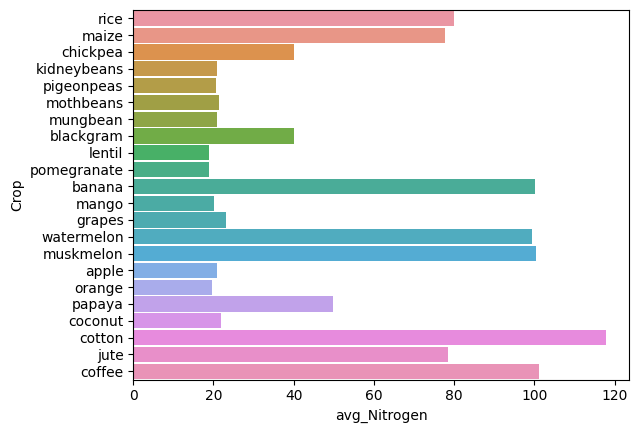

In [164]:
sns.barplot(avg_N,y='Crop',x='avg_Nitrogen',width=0.9,orient='h')

<Axes: xlabel='avg_phosphorus', ylabel='Crop'>

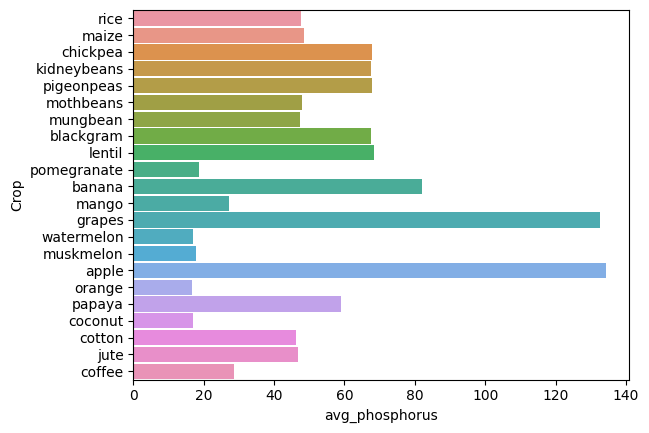

In [165]:
P={}
for i in crop_name:
    P.update({i:df[df['label']==i]['P'].mean() for i in crop_name})
avg_P=pd.DataFrame(list(P.items()),columns=['Crop','avg_phosphorus'])
sns.barplot(avg_P,y='Crop',x='avg_phosphorus',width=0.9,orient='h')   
    
    

Avg value of P for all crops

In [231]:
P_range_df=pd.DataFrame()
num=1
for i in crop_name:
    a=pd.DataFrame([[i,dict(avg_P.values)[i]-10,dict(avg_P.values)[i]+10]],columns=['crop','minP','maxP'],index=[num])
    P_range_df=pd.concat([P_range_df,a])
    num+=1           

In [233]:
P_range_df.head()

,crop,minP,maxP
1,rice,37.58,57.58
2,maize,38.44,58.44
3,chickpea,57.79,77.79
4,kidneybeans,57.54,77.54
5,pigeonpeas,57.73,77.73


Avg value of N for all crops

In [234]:
N_range_df=pd.DataFrame()
num=1
for i in crop_name:
    a=pd.DataFrame([[i,dict(avg_N.values)[i]-10,dict(avg_N.values)[i]+10]],columns=['crop','minN','maxN'],index=[num])
    N_range_df=pd.concat([N_range_df,a])
    num+=1           

In [236]:
N_range_df.head()

,crop,minN,maxN
1,rice,69.89,89.89
2,maize,67.76,87.76
3,chickpea,30.09,50.09
4,kidneybeans,10.75,30.75
5,pigeonpeas,10.73,30.73


<Axes: xlabel='avg_potassium', ylabel='Crop'>

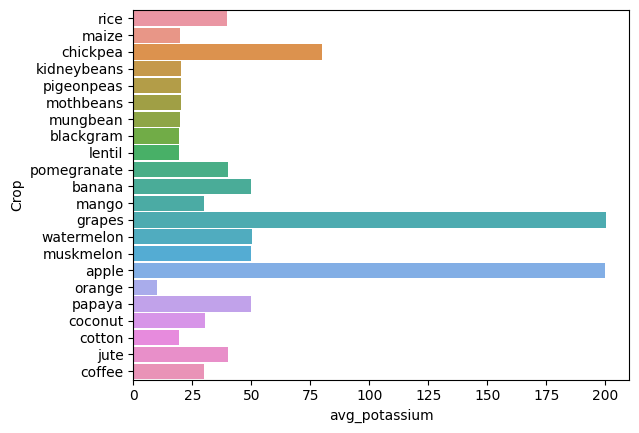

In [168]:
K={}
for i in crop_name:
    K.update({i:df[df['label']==i]['K'].mean() for i in crop_name})
avg_K=pd.DataFrame(list(K.items()),columns=['Crop','avg_potassium'])
sns.barplot(avg_K,y='Crop',x='avg_potassium',width=0.9,orient='h')
    
    
    

<Axes: xlabel='avg_rainfall', ylabel='Crop'>

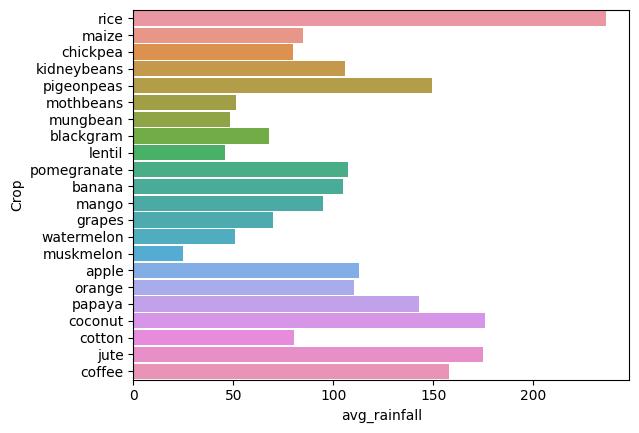

In [169]:
r={}
for i in crop_name:
    r.update({i:df[df['label']==i]['rainfall'].mean() for i in crop_name})
avg_rainfall=pd.DataFrame(list(r.items()),columns=['Crop','avg_rainfall'])
sns.barplot(avg_rainfall,y='Crop',x='avg_rainfall',width=0.9,orient='h')
    
    
    

<Axes: xlabel='avg_temp', ylabel='Crop'>

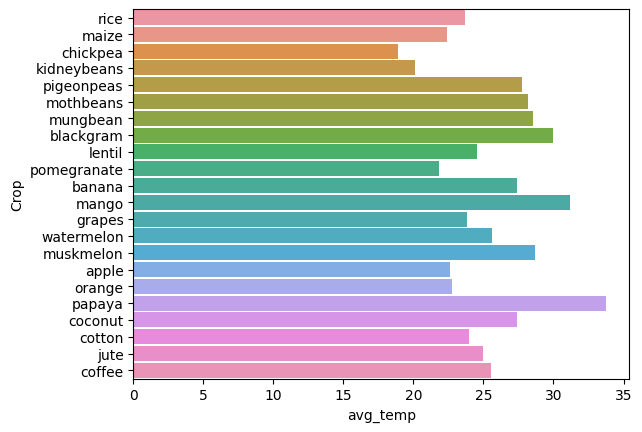

In [170]:
t={}
for i in crop_name:
    t.update({i:df[df['label']==i]['temperature'].mean() for i in crop_name})
avg_temp=pd.DataFrame(list(t.items()),columns=['Crop','avg_temp'])
sns.barplot(avg_temp,y='Crop',x='avg_temp',width=0.9,orient='h')
    
    
    

<Axes: xlabel='avg_ph', ylabel='Crop'>

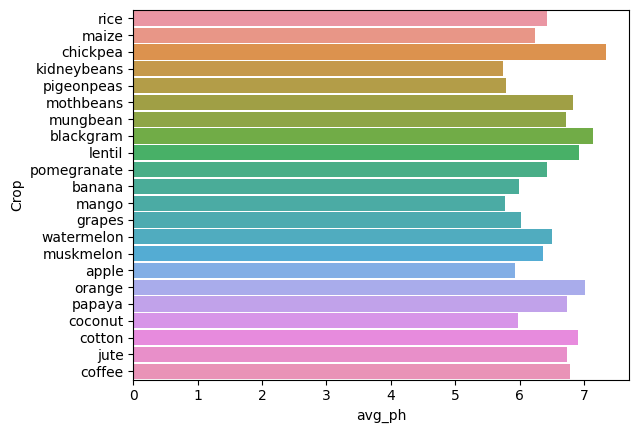

In [171]:
p={}
for i in crop_name:
    p.update({i:df[df['label']==i]['ph'].mean() for i in crop_name})
avg_ph=pd.DataFrame(list(p.items()),columns=['Crop','avg_ph'])
sns.barplot(avg_ph,y='Crop',x='avg_ph',width=0.9,orient='h')
    
    
    

In [172]:
df.head(1)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice


### train-test split

In [173]:
X = df[['N','P','K','temperature','humidity','ph','rainfall']]
Y = df['label']

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [35]:
y_train

1975       cotton
1287       grapes
760     blackgram
267      chickpea
2007         jute
          ...    
1033       banana
1731       papaya
763     blackgram
835        lentil
1653       orange
Name: label, Length: 1650, dtype: object

#### Lebel Encoding

In [36]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [37]:
y_train=encoder.fit_transform(y_train)

In [38]:
y_test=encoder.transform(y_test)

In [39]:
y_train

array([ 6,  7,  2, ...,  2, 10, 16])

In [40]:
y_test

array([21, 21,  7,  3,  2, 20, 13,  9, 15,  1, 13,  5, 10, 14, 12,  0,  5,
       10,  5, 12,  4,  2,  9,  8,  6,  5, 10, 16, 13,  9, 19, 20, 11, 15,
        4,  6, 12, 12, 21, 13, 11,  2, 18, 21, 18, 14,  9,  9,  6, 14, 13,
        2,  0, 15, 18,  1, 17, 12, 10,  6, 16, 14, 21, 20, 15,  0,  7,  5,
        0, 16,  4, 19,  9, 11,  7, 13,  3, 11,  8, 12, 20,  2, 21, 21, 15,
        6, 11, 10, 13, 17,  2,  8, 14,  7, 14, 11,  5,  8, 10,  3, 16,  8,
       14,  1,  1, 20, 21,  5, 18, 15, 15, 12,  5,  7, 16, 19, 14, 10, 11,
        8, 19, 10, 16,  3,  3,  2, 19, 16,  3, 17, 13, 13, 15, 14, 11, 14,
        4, 19, 16,  2,  2,  7,  0,  5,  3,  0,  8, 12, 21, 17, 16,  4, 13,
        1, 19,  3, 21,  2,  0,  8, 10, 18,  8,  9,  9, 15, 20, 15,  1, 16,
       18,  0, 13,  4,  6, 14,  9, 19, 17, 16, 20, 17, 17, 18,  9,  1,  4,
       18, 20, 17, 11,  8, 13, 20, 11,  5, 18,  4,  3, 12,  4, 19, 11, 13,
       13, 16, 15, 11, 18,  1,  3,  2, 18, 16, 13, 14, 12, 17, 15, 19, 20,
       20,  2, 17,  2,  5

In [41]:
encoder.classes_

array(['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee',
       'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize',
       'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya',
       'pigeonpeas', 'pomegranate', 'rice', 'watermelon'], dtype=object)

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
rfc=RandomForestClassifier()

In [44]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [45]:
from sklearn.metrics import mean_squared_error,accuracy_score,precision_score,f1_score

In [46]:
y_pred=rfc.predict(x_test)

In [47]:
accuracy_score(y_test,y_pred)

0.9981818181818182

In [48]:
mean_squared_error(y_test,y_pred)

0.26181818181818184

In [49]:
from sklearn.model_selection import cross_val_score

In [50]:
score = cross_val_score(rfc,X=X, y=Y,cv=7,scoring='accuracy')
score

array([0.9968254 , 1.        , 0.99044586, 0.99681529, 0.99681529,
       0.99363057, 0.99044586])

In [51]:
data = np.array([[104,18,30,23.6,60,6.67,140]])
prediction = encoder.inverse_transform(rfc.predict(data))
print(prediction)

['coffee']


C:\Users\lenovo\New folder\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [52]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [74]:
dt={'N':0,'P':0,'K':0,'temperature':0,'humidity':0,'ph':0,'rainfall':0}
ran=pd.DataFrame(dt,index=[0])

In [99]:
(ran == 0).all().all()

True

In [75]:
ran.size

7

In [63]:
prediction = encoder.inverse_transform(rfc.predict(ran))
print(prediction)

['coffee']


In [53]:
#data = np.array([[110,50,60,25,70,6.5,150]])

In [54]:
#data

In [55]:
#data = np.array([[110,50,60,25,70,6.5,150]])
#prediction = encoder.inverse_transform(rfc.predict(data))
#print(prediction)

In [64]:
import pickle

In [67]:
pickle.dump(encoder,open('encoder.pkl','wb'))
pickle.dump(rfc,open('rfc.pkl','wb'))

In [101]:
df.head(5)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
